# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

>**Tip**: Though it's not a mandate, students can attempt the classroom quizzes to ensure statistical numeric values are calculated correctly in many cases.

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


>**Tip**: Please save your work regularly.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

**c.** The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

**d.** The proportion of users converted.

In [5]:
df['converted'].mean()

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')].shape[0]

1965

**f.** Do any of the rows have missing values?

In [7]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
messy_rows= df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')]
messy_rows2 = df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')]
df.drop(messy_rows.index,inplace=True)
df.drop(messy_rows2.index,inplace=True)

In [9]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [10]:
df['user_id'].nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df[df['user_id'].duplicated() == True].head()

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [12]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df['user_id'].drop_duplicates(inplace=True)
# Check again if the row with a duplicate user_id is deleted or not
df['user_id'].duplicated().sum()

0

### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

>**Tip**: The probability  you'll compute represents the overall "converted" success rate in the population and you may call it $p_{population}$.



In [13]:
df['converted'].mean()

0.11959667567149027

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [14]:
control_cr = df.groupby('group')['converted'].mean()[0]

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [15]:
treat_cr =  df.groupby('group')['converted'].mean()[1]

>**Tip**: The probabilities you've computed in the points (b). and (c). above can also be treated as conversion rate. 
Calculate the actual difference  (`obs_diff`) between the conversion rates for the two groups. You will need that later.  

In [16]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = control_cr - treat_cr
obs_diff

0.0015790565976871451

**d.** What is the probability that an individual received the new page?

In [17]:
df[df['landing_page'] == 'new_page'].shape[0]/df.shape[0]

0.5000636646764286

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

### The treatment group had a smaller conversion rate(11.8%) than the control group(12%), so we can't say that the new page did better than the old one.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1


### Null Hypothesis(H0): Pold >= Pnew
### Alternative Hypothesis(H1): Pold < Pnew

### ToDo 2.2 - Null Hypothesis $H_0$ Testing

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [18]:
Pnew = df['converted'].mean()

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [19]:
Pold = df['converted'].mean()

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [20]:
Nnew = df[df['group'] == 'treatment'].shape[0]

**d.** What is $n_{old}$, the number of individuals in the control group?

In [21]:
Nold = df[df['group'] == 'control'].shape[0]

**e.** Simulate Nnew transactions with a convert rate of Pnew under the null. Store these Nnew 1's and 0's in new_page_converted.

In [22]:
new_page_converted = np.random.binomial(1,Pnew,Nnew)
new_page_converted.mean()

0.11939908196901818

**f.** Simulate Nold transactions with a convert rate of Pold under the null. Store these Nold 1's and 0's in old_page_converted.

In [23]:
old_page_converted = np.random.binomial(1,Pold,Nold)
old_page_converted.mean()

0.12062034500323526

**g.** Find Pnew - Pold for your simulated values from part (e) and (f).

In [24]:
new_page_converted.mean() - old_page_converted.mean()

-0.0012212630342170877

**h.** Simulate 10,000 Pnew - Pold values using this same process similarly to the one you calculated in parts a. through g. above. Store all 10,000 values in a numpy array called p_diffs.

In [25]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.binomial(1,Pnew,Nnew)
    old_page_converted = np.random.binomial(1,Pold,Nold)
    p_diffs.append(new_page_converted.mean()-old_page_converted.mean())

## Simulate Sample 


i. Plot a histogram of the p_diffs. Does this plot look like what you expected? Use the matching problem in the classroom to assure you fully understand what was computed here.

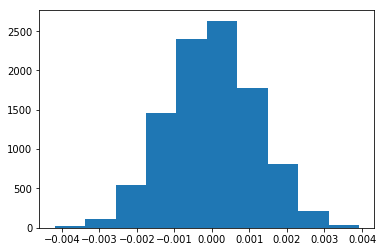

In [26]:
p_diffs = np.array(p_diffs)

plt.hist(p_diffs);

j. What proportion of the p_diffs are greater than the actual difference observed in ab_data.csv?

In [27]:
obs_diff = df[df['group'] == 'treatment'].converted.mean() - df[df['group'] == 'control'].converted.mean()
obs_diff

-0.0015790565976871451

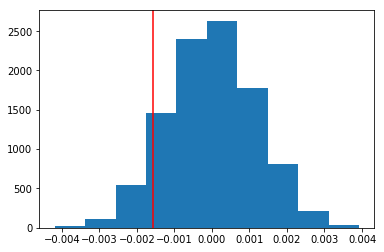

In [28]:
plt.hist(p_diffs)
plt.axvline(obs_diff,c='red')

In [29]:
#calculate p_value
(p_diffs > obs_diff).mean()

0.9093

**k.** In words, explain what you just computed in part j. What is this value called in scientific studies? What does this value mean in terms of whether or not there is a difference between the new and old pages?

### This value is called the **p-value**. it is a value used to know if we should reject the null hypothesis or not by comparing it to the allowed type1 error.<br>
### In this case we computed a p-value of almost 0.9 which means that 90% of p-diffs were higher than the actual difference in the data.<br>
### This means that we can't say that the new page increased the conversions and we **cannot reject the null hypothesis**.

l. We could also use a built-in to achieve similar results. Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let n_old and n_new refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

n_old = df[df['landing_page'] == 'old_page'].shape[0]
n_new = df[df['landing_page'] == 'new_page'].shape[0]

old_conv = df[(df['converted'] == 1) & (df['landing_page'] == 'old_page')].shape[0]
new_conv = df[(df['converted'] == 1) & (df['landing_page'] == 'new_page')].shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [31]:
n_old,n_new

(145274, 145311)

In [32]:
old_conv,new_conv

(17489, 17264)

m. Now use stats.proportions_ztest to compute your test statistic and p-value.

In [34]:
score , p_value =sm.stats.proportions_ztest([old_conv, new_conv], [n_old, n_new],value=None, alternative='smaller', prop_var=False)
score , p_value

(1.3116075339133115, 0.90517370514059103)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages? Do they agree with the findings in parts j. and k.?

### The p-value and score computed agree with my findings in the previous section that is we can't reject the null hypothesis as the p-value is too high.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Logistic Regression**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:  

In [35]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [38]:
df['intercept'] = 1
df[['treatment','control']] = pd.get_dummies(df['landing_page'])
df.rename(columns = {'treatment' : 'ab_page'},inplace = True)
df.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,control
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 

In [39]:
log_mod = sm.Logit(df['converted'],df[['intercept','ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-11-11 13:17 AIC:              212780.6032
No. Observations:   290585           BIC:              212801.7625
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290583           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with ab_page? Why does it differ from the value you found in Part II?

### The p-value of ab_page seems to be ~0.19, which is still too high to reject the null.
### The p-value in part 2 was ~0.9, which is different from the one generated by the model, this can be because of the differences between tests (Upper-tailed,lower-tailed,two-tailed).

### The model seems to show that people who recieved the treatment converted less than the people who didnt, which correlates with the hypothesis test.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

### Seeing as there are a lot of factors which may affect the result of any A/B test, it is important to take as many factors into account as possible.
### Some disadvantages is that the model may become too complex and fall victim to multiple problems(collinearity,higher order terms,etc...)

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

In [41]:
# Read the countries.csv
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [42]:
# Join with the df2 dataframe
df_merged = pd.merge(df,df_countries,on='user_id')
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,control,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,US


In [43]:
# Create the necessary dummy variables
df_merged[['US','UK','CA']] = pd.get_dummies(df_merged['country'])

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


In [44]:
# Fit your model, and summarize the results
log_mod = sm.Logit(df_merged['converted'],df_merged[['intercept','ab_page','US','UK']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-11-11 13:17 AIC:              212781.3782
No. Observations:   290585           BIC:              212823.6968
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7629  0.0000  -2.0067  -1.9718
ab_page      -0.0150    0.0114    -1.3076  0.1910  -0.0374   0.0075
US           -0.0408    0.0269    -1.5159  0.1296  -0.0934   0.0119
UK            0.0099    0.0133     0.7437  0.4570  -0.0162   0.0359
==================================================================

"""

In [46]:
#Create columns of countries that converted.
df_merged['UK_ab_page'] = df_merged.UK * df_merged.ab_page
df_merged['US_ab_page'] = df_merged.US * df_merged.ab_page

df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,control,country,US,UK,CA,UK_ab_page,US_ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,US,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,US,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,US,0,0,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,US,0,0,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,US,0,0,1,0,0


In [47]:
log_mod = sm.Logit(df_merged['converted'],df_merged[['intercept','ab_page','US','UK','US_ab_page','UK_ab_page']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-11-11 13:18 AIC:              212782.9124
No. Observations:   290585           BIC:              212846.3903
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5060  0.1321  -0.0474   0.0062
US           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
US_ab_page   -0.0469    0.0538    -0.8716  0.3834  -0.1523   0.0585
UK_ab_page    0.0314    0.0266     1.1811  0.2375  -0.0207   0.0835
==================================================================

"""

### The model seems to show that the p-value for uk_ab_page and us_ab _page are also not statistically significant similar to the group variable as they are bigger than 0.05, which means we can't say that people from a certain country reacted differently to the new page,and we can't reject the null.

<a id='finalcheck'></a>
## Conclusion

After running a hypothesis test, it was clear that the conversions generated by the new page were not significant, and by running multiple logistic regression models and interpreting the results, it became clear that the site **should not implement the new page and should stick with the older page**.




<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [48]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0